# 🚖 주제
- 이동거리 및 승객수에 따른 우버 요금 회귀 분석
- 차후 구글 맵 연동하여 실제 차량 이동거리를 확인하여 해볼 것.

### 🚕 데이터 셋 feature 설명

| 컬럼명                      | 설명                                               |
|--------------------------|--------------------------------------------------|
| `key`             | 각 여행의 고유 식별자.                                    |
| `fare_amount`           | 각 여행 비용(USD).               |
| `pickup_datetime`       | 미터기가 작동된 날짜 및 시간.                             |
| `pickup_longitude`  | 미터기가 작동된 경도.                  |
| `pickup_latitude`| 미터기가 작동된 위도.                                        |
| `dropoff_longitude`         | 미터기가 해재된 경도.                                          |
| `dropoff_latitude`            | 미터기가 헤제된 위도.                                             |
| `passenger_count`  | 승객 수.                             |

In [1]:
# 데이터 가져오기
import pandas as pd

u_df = pd.read_csv('../../datasets/p_Uber linear data/uber.csv')
u_df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [2]:
# 데이터 정보 확인
pre_u_df = u_df.copy()
pre_u_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [3]:
# 불필요 데이터 삭제
pre_u_df = pre_u_df.drop(labels = ['Unnamed: 0', 'key', 'pickup_datetime'], axis =1)
pre_u_df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
# 결측치 확인
pre_u_df.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
# 결측치 행 확인 후 삭제
pre_u_df = pre_u_df[~pre_u_df['dropoff_latitude'].isna()]
pre_u_df = pre_u_df.reset_index(drop=True)
pre_u_df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199994,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199995,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199996,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199997,14.5,-73.997124,40.725452,-73.983215,40.695415,1


In [6]:
# 중복값 확인 및 삭제
pre_u_df.duplicated().sum()
pre_u_df = pre_u_df.drop_duplicates().reset_index(drop=True)
pre_u_df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
196972,3.0,-73.987042,40.739367,-73.986525,40.740297,1
196973,7.5,-73.984722,40.736837,-74.006672,40.739620,1
196974,30.9,-73.986017,40.756487,-73.858957,40.692588,2
196975,14.5,-73.997124,40.725452,-73.983215,40.695415,1


In [7]:
pre_u_df.duplicated().sum()

0

In [8]:
# 위도 경도에 대하여 이상치 있는지 확인
display(pre_u_df[pre_u_df['pickup_longitude'] >= 180])
display(pre_u_df[pre_u_df['pickup_latitude'] >= 180])
display(pre_u_df[pre_u_df['dropoff_latitude'] >= 180])
display(pre_u_df[pre_u_df['dropoff_longitude'] >= 180])


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
55932,8.1,-73.960828,404.433332,-73.988357,40.769037,1
61038,8.5,-73.951385,401.066667,-73.982110,40.754117,1
74884,15.7,-1340.648410,1644.421482,-3356.666300,872.697628,1
90217,16.1,57.418457,1292.016128,1153.572603,-881.985513,1


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
74884,15.7,-1340.648410,1644.421482,-3356.666300,872.697628,1
137436,13.7,-74.011042,40.709780,-73.983163,493.533332,4


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
90217,16.1,57.418457,1292.016128,1153.572603,-881.985513,1


In [9]:
# 위도, 경도에 대한 이상치 제거
columns = ['pickup_latitude','dropoff_latitude']

for i in range(2):
    out_of_index = pre_u_df[~pre_u_df[columns[i]].between(-180, 180)].index
    pre_u_df = pre_u_df.drop(out_of_index).reset_index(drop=True)

pre_u_df

columns = ['pickup_longitude','dropoff_longitude']
for i in range(2):
    out_of_index = pre_u_df[~pre_u_df[columns[i]].between(-90, 90)].index
    pre_u_df = pre_u_df.drop(out_of_index).reset_index(drop=True)

pre_u_df


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
196959,3.0,-73.987042,40.739367,-73.986525,40.740297,1
196960,7.5,-73.984722,40.736837,-74.006672,40.739620,1
196961,30.9,-73.986017,40.756487,-73.858957,40.692588,2
196962,14.5,-73.997124,40.725452,-73.983215,40.695415,1


In [10]:
# target 데이터가 음수인 경우 제거

pre_u_df = pre_u_df[pre_u_df['fare_amount'] >= 0]
pre_u_df

# Cycle03 에서 사용을 위한 이상치를 제거한 copy 데이터 생성
normal_u_df = pre_u_df.copy()

In [11]:
# 위도와 경도를 통한 출발지와 목적지의 직선 거리 확인 (지구는 둥굴기 때문에 haversine공식을 이용해 호의 길이로 구함)
# 실제 택시의 경우 직선거리를 이동하진 않지만 대락젹인 금액을 측정하기 위해서 확인.

from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    두 점의 위도와 경도를 받아서 지구 상에서의 대원거리를 미터 단위로 반환합니다.
    """
    # 위도와 경도를 라디안 단위로 변환
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine 공식
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371000  # 지구의 반경 (미터)
    return c * r


In [12]:
# 위도와 경도 확인 후 계산
print(pre_u_df['fare_amount'].count())
pre_u_df = pre_u_df.copy()
lon1 = pre_u_df['pickup_longitude'].values
lat1 = pre_u_df['pickup_latitude'].values
lon2 = pre_u_df['dropoff_longitude'].values
lat2 = pre_u_df['dropoff_latitude'].values

distances = []
for i in range(pre_u_df['fare_amount'].count()):
    distance = haversine(lon1[i], lat1[i], lon2[i], lat2[i])
    distances.append(distance)

pre_u_df['distance(m)'] = distances
pre_u_df

196947


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance(m)
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1683.322752
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2457.589884
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5036.377190
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1661.683458
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4475.449963
...,...,...,...,...,...,...,...
196959,3.0,-73.987042,40.739367,-73.986525,40.740297,1,112.210245
196960,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1875.050167
196961,30.9,-73.986017,40.756487,-73.858957,40.692588,2,12850.319118
196962,14.5,-73.997124,40.725452,-73.983215,40.695415,1,3539.715452


In [13]:
# 불필요 feature 삭제
columns = ['pickup_latitude', 'pickup_longitude','dropoff_latitude','dropoff_longitude']

pre_u_df = pre_u_df.drop(labels = columns, axis =1)
pre_u_df


,fare_amount,passenger_count,distance(m)
0,7.5,1,1683.322752
1,7.7,1,2457.589884
2,12.9,1,5036.377190
3,5.3,3,1661.683458
4,16.0,5,4475.449963
...,...,...,...
196959,3.0,1,112.210245
196960,7.5,1,1875.050167
196961,30.9,2,12850.319118
196962,14.5,1,3539.715452


In [14]:
# 타겟 데이터 위치 변경
# pre_u_df = pre_u_df.copy()

target_column = pre_u_df.pop('fare_amount')
pre_u_df['target']= target_column
pre_u_df

,passenger_count,distance(m),target
0,1,1683.322752,7.5
1,1,2457.589884,7.7
2,1,5036.377190,12.9
3,3,1661.683458,5.3
4,5,4475.449963,16.0
...,...,...,...
196959,1,112.210245,3.0
196960,1,1875.050167,7.5
196961,2,12850.319118,30.9
196962,1,3539.715452,14.5


array([[<Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'distance(m)'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

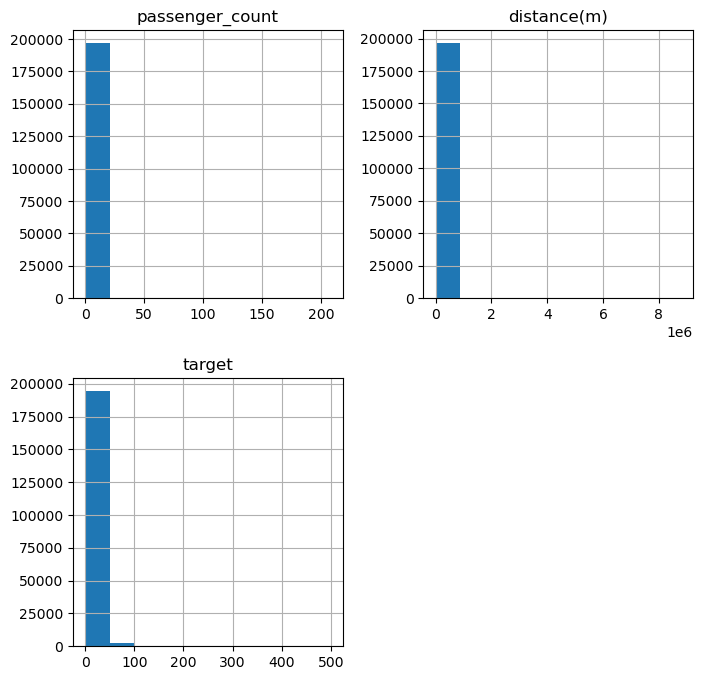

In [15]:
# hist 확인
pre_u_df.hist(figsize= (8,8))

In [16]:
# 거리가 0 인 데이터에 대해서는 이상치로 간주하고 제거

pre_u_df= pre_u_df[pre_u_df['distance(m)'] != 0]
pre_u_df.reset_index(drop=True)

,passenger_count,distance(m),target
0,1,1683.322752,7.5
1,1,2457.589884,7.7
2,1,5036.377190,12.9
3,3,1661.683458,5.3
4,5,4475.449963,16.0
...,...,...,...
194332,1,112.210245,3.0
194333,1,1875.050167,7.5
194334,2,12850.319118,30.9
194335,1,3539.715452,14.5


In [17]:
# 이상치 제거를 위한 표준화 작업
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(pre_u_df)
std_pre_u_df = pd.DataFrame(result, columns = pre_u_df.columns)
std_pre_u_df


,passenger_count,distance(m),target
0,-0.493267,-0.050486,-0.395527
1,-0.493267,-0.048472,-0.375011
2,-0.493267,-0.041766,0.158402
3,0.947252,-0.050542,-0.621201
4,2.387772,-0.043224,0.476398
...,...,...,...
194332,-0.493267,-0.054572,-0.857134
194333,-0.493267,-0.049987,-0.395527
194334,0.226992,-0.021443,2.004830
194335,-0.493267,-0.045658,0.322529


In [18]:
# 이상치 확인 및 제거
condition = True
error_count = []

for column in std_pre_u_df.columns:
    if std_pre_u_df[column].between(-1.96, 1.96) is True:
        error_count.append(std_pre_u_df[column].between(-1.96, 1.96).count())
    condition &= std_pre_u_df[column].between(-1.96, 1.96)

std_pre_u_df = std_pre_u_df[condition]
std_pre_u_df

,passenger_count,distance(m),target
0,-0.493267,-0.050486,-0.395527
1,-0.493267,-0.048472,-0.375011
2,-0.493267,-0.041766,0.158402
3,0.947252,-0.050542,-0.621201
6,-0.493267,-0.048797,-0.169852
...,...,...,...
194331,-0.493267,-0.051944,0.066080
194332,-0.493267,-0.054572,-0.857134
194333,-0.493267,-0.049987,-0.395527
194335,-0.493267,-0.045658,0.322529


In [19]:
# 이상치 제거한 데이터를 인덱스 번호에 맞게 가져오기
pre_u_df = pre_u_df.iloc[std_pre_u_df.index].reset_index(drop=True)
pre_u_df

,passenger_count,distance(m),target
0,1,1683.322752,7.5
1,1,2457.589884,7.7
2,1,5036.377190,12.9
3,3,1661.683458,5.3
4,1,2332.711009,9.7
...,...,...,...
167545,1,1122.877892,12.0
167546,1,112.210245,3.0
167547,1,1875.050167,7.5
167548,1,3539.715452,14.5


array([[<Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'distance(m)'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

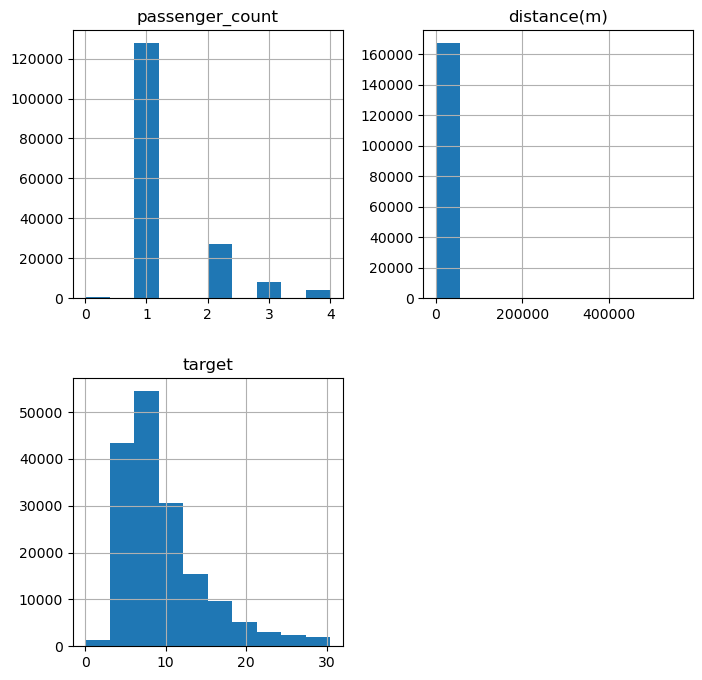

In [20]:
# hist 확인
pre_u_df.hist(figsize= (8,8))

<Axes: >

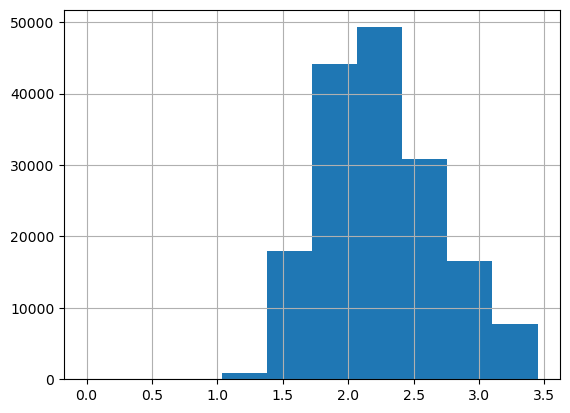

In [21]:
# hist 확인
import numpy as np
np.log1p(pre_u_df['target']).hist()

In [22]:
# np.log1p(pre_u_df['distance(m)']).hist()
# np.exp(pre_u_df['distance(m)']).hist()

In [23]:
# # target 의 분포를 조금 오른쪽으로 하기 위하여 log 확인
# pre_u_df['target'] = np.log1p(pre_u_df['target'])
# pre_u_df

pre_u_df['distance(m)'] = np.log1p(pre_u_df['distance(m)'])
pre_u_df

,passenger_count,distance(m),target
0,1,7.429119,7.5
1,1,7.807343,7.7
2,1,8.524641,12.9
3,3,7.416188,5.3
4,1,7.755215,9.7
...,...,...,...
167545,1,7.024540,12.0
167546,1,4.729247,3.0
167547,1,7.536924,7.5
167548,1,8.172084,14.5


# 데이터 시각화

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


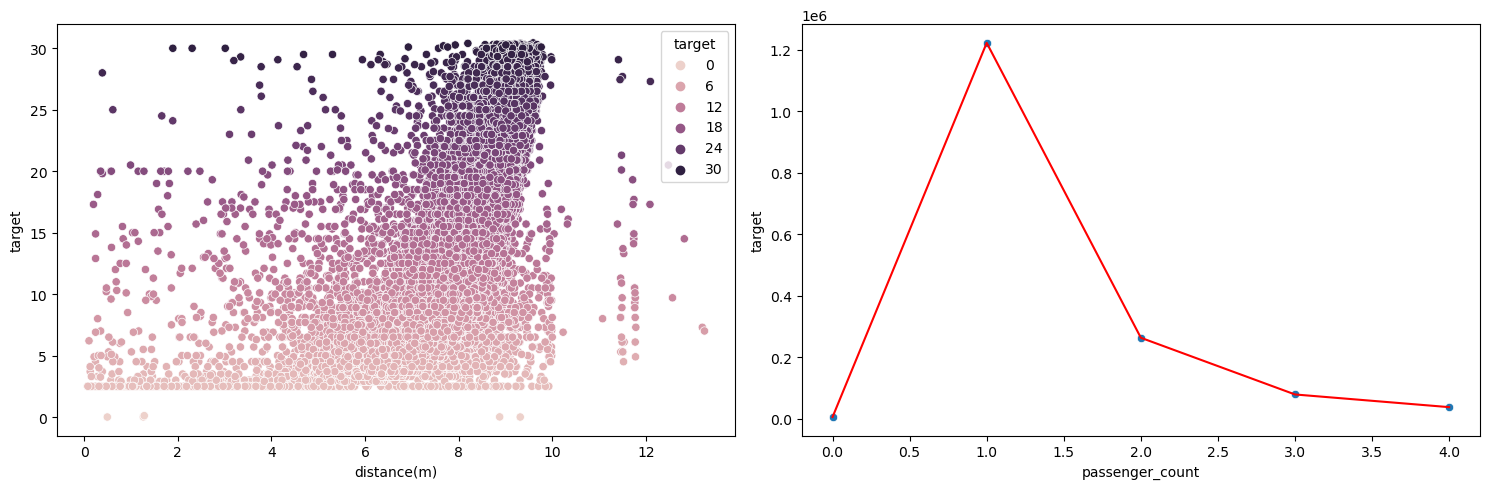

In [24]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

group_u_df = pre_u_df[['target','passenger_count']].groupby('passenger_count').sum('target').reset_index()
group_u_df

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(ax=axes[0], x= 'distance(m)', y= 'target', hue= 'target',data = pre_u_df)
sns.scatterplot(ax=axes[1], x='passenger_count', y = 'target', data = group_u_df)
sns.lineplot(ax=axes[1], x='passenger_count', y='target', data=group_u_df, color='red')


plt.tight_layout()
plt.show()

선형보다는 비선형에 가까운 모델로 확인

# 데이터 분석 (Cycle01)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_u_df.iloc[:, :-1], pre_u_df.iloc[:, -1]


X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [26]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation_negative(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    # MSLE = mean_squared_log_error(y_test, prediction)
    # RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    # print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
    #       .format(MSE, RMSE, MSLE, RMSLE, R2))
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [27]:
prediction = l_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 12.9946, RMSE: 3.6048, R2: 0.5276


In [28]:
# 비선형 회귀 모델 확인
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [29]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [30]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 8.9122, RMSE: 2.9853, MSLE: 0.0704, RMSLE: 0.2652, R2: 0.6760


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = pre_u_df.iloc[:, :-1], pre_u_df.iloc[:, -1]

X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=321)

dt_r = DecisionTreeRegressor(random_state=321)
rd_r = RandomForestRegressor(random_state=321)
gb_r = GradientBoostingRegressor(random_state=321)
xgb_r = XGBRegressor(random_state=321)
lgb_r = LGBMRegressor(random_state=321)

models = [dt_r, rd_r, gb_r, xgb_r, lgb_r]

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 13.9944, RMSE: 3.7409, MSLE: 0.1008, RMSLE: 0.3175, R2: 0.4912
RandomForestRegressor
MSE: 9.8383, RMSE: 3.1366, MSLE: 0.0724, RMSLE: 0.2690, R2: 0.6423
GradientBoostingRegressor
MSE: 7.0382, RMSE: 2.6530, MSLE: 0.0514, RMSLE: 0.2266, R2: 0.7441
XGBRegressor
MSE: 7.1407, RMSE: 2.6722, MSLE: 0.0518, RMSLE: 0.2277, R2: 0.7404
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 134040, number of used features: 2
[LightGBM] [Info] Start training from score 9.592329
LGBMRegressor
MSE: 7.1159, RMSE: 2.6676, MSLE: 0.0516, RMSLE: 0.2272, R2: 0.7413


# C01
- 비선형 데이터에 가까운 모델로 확인

# Cycle 02 
- 데이터 전처리 (상관관계, 다중공산성, OLS 지표 확인)
- feature 제거 후 훈련 진행 

In [32]:
pre_u_df.corr()['target'].sort_values(ascending=False)[1:]

distance(m)        0.728777
passenger_count    0.012836
Name: target, dtype: float64

<Axes: >

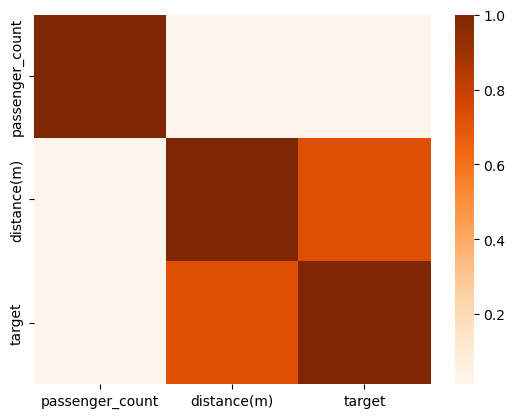

In [33]:
corr = pre_u_df.corr()
sns.heatmap(corr, cmap="Oranges")

In [34]:
# OLS 수치 확인
from statsmodels.api import OLS

features, targets = pre_u_df.iloc[:, :-1], pre_u_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.833
Model:                            OLS   Adj. R-squared (uncentered):              0.833
Method:                 Least Squares   F-statistic:                          4.168e+05
Date:                Fri, 10 May 2024   Prob (F-statistic):                        0.00
Time:                        15:45:22   Log-Likelihood:                     -4.8861e+05
No. Observations:              167550   AIC:                                  9.772e+05
Df Residuals:                  167548   BIC:                                  9.772e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [36]:
# 다중공선성 확인
get_vif(features)

,vif_score,feature
0,4.58912,passenger_count
1,4.58912,distance(m)


In [37]:
pre_u_df = pre_u_df.drop(labels = ['passenger_count'], axis = 1)
pre_u_df

,distance(m),target
0,7.429119,7.5
1,7.807343,7.7
2,8.524641,12.9
3,7.416188,5.3
4,7.755215,9.7
...,...,...
167545,7.024540,12.0
167546,4.729247,3.0
167547,7.536924,7.5
167548,8.172084,14.5


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_u_df.iloc[:, :-1], pre_u_df.iloc[:, -1]


X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [39]:
prediction = l_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 12.9922, RMSE: 3.6045, R2: 0.5277


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


poly_features = PolynomialFeatures(degree=2).fit_transform(features)


X_train, X_test, y_train, y_test =\
train_test_split(poly_features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [41]:
prediction = l_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 8.9123, RMSE: 2.9853, R2: 0.6760


In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = pre_u_df.iloc[:, :-1], pre_u_df.iloc[:, -1]

X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=321)

dt_r = DecisionTreeRegressor(random_state=321)
rd_r = RandomForestRegressor(random_state=321)
gb_r = GradientBoostingRegressor(random_state=321)
xgb_r = XGBRegressor(random_state=321)
lgb_r = LGBMRegressor(random_state=321)

models = [dt_r, rd_r, gb_r, xgb_r, lgb_r]

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 13.7621, RMSE: 3.7097, MSLE: 0.0996, RMSLE: 0.3156, R2: 0.4997
RandomForestRegressor
MSE: 10.1926, RMSE: 3.1926, MSLE: 0.0751, RMSLE: 0.2740, R2: 0.6294
GradientBoostingRegressor
MSE: 7.0396, RMSE: 2.6532, MSLE: 0.0514, RMSLE: 0.2267, R2: 0.7441
XGBRegressor
MSE: 7.1142, RMSE: 2.6672, MSLE: 0.0517, RMSLE: 0.2273, R2: 0.7414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000764 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 134040, number of used features: 1
[LightGBM] [Info] Start training from score 9.592329
LGBMRegressor
MSE: 7.1133, RMSE: 2.6671, MSLE: 0.0517, RMSLE: 0.2273, R2: 0.7414


# C02
- Cycle 01에 비하여 02에서 feature를 제거했음에도 불구하고 수치의 큰 변화는 없는 것으로 확인.
- 데이터 엔지니어링을 진행했을 때 단순 직선거리로 판단했기 때문에 엔지니어링 이전 데이터 프레임으로 훈련진행.

# Cycle03
- 원본 데이터 프레임에서 표준화, 이상치를 제거한 후 훈련 진행
- 파이프라인을 활용

In [43]:
target_column = normal_u_df.pop('fare_amount')
normal_u_df.loc[:, 'target'] = target_column
normal_u_df

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,target
0,-73.999817,40.738354,-73.999512,40.723217,1,7.5
1,-73.994355,40.728225,-73.994710,40.750325,1,7.7
2,-74.005043,40.740770,-73.962565,40.772647,1,12.9
3,-73.976124,40.790844,-73.965316,40.803349,3,5.3
4,-73.925023,40.744085,-73.973082,40.761247,5,16.0
...,...,...,...,...,...,...
196959,-73.987042,40.739367,-73.986525,40.740297,1,3.0
196960,-73.984722,40.736837,-74.006672,40.739620,1,7.5
196961,-73.986017,40.756487,-73.858957,40.692588,2,30.9
196962,-73.997124,40.725452,-73.983215,40.695415,1,14.5


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = normal_u_df.iloc[:, :-1], normal_u_df.iloc[:, -1]


X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [45]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 93.1926, RMSE: 9.6536, MSLE: 0.3326, RMSLE: 0.5767, R2: 0.0029


In [46]:
# 비선형 회귀 모델 확인
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [47]:
prediction = l_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 87.9820, RMSE: 9.3799, R2: 0.0587


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

features, targets = normal_u_df.iloc[:, :-1], normal_u_df.iloc[:, -1]

X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=321)

# 파이프라인 구성: 표준 스케일러 및 선형 회귀 모델
pipe = Pipeline([
    ('std', StandardScaler()),
    ('lr', LinearRegression())
])

# 데이터에 파이프라인 적용
pipe.fit(X_train, y_train)


Pipeline(steps=[('std', StandardScaler()), ('lr', LinearRegression())])

In [49]:
prediction = pipe.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 93.1926, RMSE: 9.6536, R2: 0.0029


In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# 파이프라인 구성
pipe = Pipeline([
    ('std', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('lr', LinearRegression())
])

pipe.fit(X_train, y_train)


Pipeline(steps=[('std', StandardScaler()), ('poly', PolynomialFeatures()),
                ('lr', LinearRegression())])

In [51]:
prediction = pipe.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 87.9820, RMSE: 9.3799, R2: 0.0587


In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = normal_u_df.iloc[:, :-1], normal_u_df.iloc[:, -1]

X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=321)

dt_r = DecisionTreeRegressor(random_state=321)
rd_r = RandomForestRegressor(random_state=321)
gb_r = GradientBoostingRegressor(random_state=321)
xgb_r = XGBRegressor(random_state=321)
lgb_r = LGBMRegressor(random_state=321)

models = [dt_r, rd_r, gb_r, xgb_r, lgb_r]

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation_negative(y_test, prediction)

DecisionTreeRegressor
MSE: 37.4306, RMSE: 6.1181, R2: 0.5995
RandomForestRegressor
MSE: 20.0222, RMSE: 4.4746, R2: 0.7858
GradientBoostingRegressor
MSE: 25.4483, RMSE: 5.0446, R2: 0.7277
XGBRegressor
MSE: 20.7758, RMSE: 4.5580, R2: 0.7777
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1028
[LightGBM] [Info] Number of data points in the train set: 157557, number of used features: 5
[LightGBM] [Info] Start training from score 11.399803
LGBMRegressor
MSE: 21.1546, RMSE: 4.5994, R2: 0.7737


In [53]:
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.562
Model:                            OLS   Adj. R-squared (uncentered):              0.562
Method:                 Least Squares   F-statistic:                          5.061e+04
Date:                Fri, 10 May 2024   Prob (F-statistic):                        0.00
Time:                        15:47:38   Log-Likelihood:                     -7.3281e+05
No. Observations:              196947   AIC:                                  1.466e+06
Df Residuals:                  196942   BIC:                                  1.466e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [54]:
get_vif(features)

,vif_score,feature
0,3888.725546,pickup_longitude
1,4103.012179,pickup_latitude
2,4005.648796,dropoff_longitude
3,4225.155235,dropoff_latitude
4,2.449770,passenger_count


In [55]:
normal_u_df.corr()['target'].sort_values(ascending=False)[1:]

dropoff_longitude    0.056692
pickup_longitude     0.055042
passenger_count      0.010647
pickup_latitude     -0.045920
dropoff_latitude    -0.047723
Name: target, dtype: float64

# Cycle04
- 다중공선성의 문제가 매우 높은 부분이 있음을 판단. 시간 데이터 확인

In [56]:
u_df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [57]:
u_df.pickup_datetime

0         2015-05-07 19:52:06 UTC
1         2009-07-17 20:04:56 UTC
2         2009-08-24 21:45:00 UTC
3         2009-06-26 08:22:21 UTC
4         2014-08-28 17:47:00 UTC
                   ...           
199995    2012-10-28 10:49:00 UTC
199996    2014-03-14 01:09:00 UTC
199997    2009-06-29 00:42:00 UTC
199998    2015-05-20 14:56:25 UTC
199999    2010-05-15 04:08:00 UTC
Name: pickup_datetime, Length: 200000, dtype: object

In [58]:
uu_df = u_df.copy()

In [59]:
uu_df['pickup_datetime'] = pd.to_datetime(uu_df['pickup_datetime'])
uu_df['pickup_hour'] = uu_df['pickup_datetime'].dt.hour
display(uu_df['pickup_hour'].value_counts())

pickup_hour
19    12605
18    12072
20    11755
21    11446
22    11023
13    10024
12     9924
23     9805
17     9758
14     9749
15     9614
11     9422
9      9339
8      9075
10     8944
16     8313
0      7844
7      7231
1      5908
2      4422
6      4139
3      3256
4      2365
5      1967
Name: count, dtype: int64

In [60]:
# 불필요 데이터 삭제
uu_df = uu_df.drop(labels = ['Unnamed: 0', 'key', 'pickup_datetime'], axis =1)
uu_df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17
...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14


In [61]:
uu_df.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
pickup_hour          0
dtype: int64

In [62]:
# 결측치 행 확인 후 삭제
uu_df = uu_df[~uu_df['dropoff_latitude'].isna()]
uu_df = uu_df.reset_index(drop=True)
uu_df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17
...,...,...,...,...,...,...,...
199994,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10
199995,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1
199996,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0
199997,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14


In [63]:
uu_df.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_hour          0
dtype: int64

In [64]:
# 중복값 확인 및 삭제
uu_df.duplicated().sum()
uu_df = uu_df.drop_duplicates().reset_index(drop=True)
uu_df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17
...,...,...,...,...,...,...,...
198602,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10
198603,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1
198604,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0
198605,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14


In [65]:
uu_df.duplicated().sum()

0

In [66]:
target_column = uu_df.pop('fare_amount')
uu_df['target'] = target_column
uu_df

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,target
0,-73.999817,40.738354,-73.999512,40.723217,1,19,7.5
1,-73.994355,40.728225,-73.994710,40.750325,1,20,7.7
2,-74.005043,40.740770,-73.962565,40.772647,1,21,12.9
3,-73.976124,40.790844,-73.965316,40.803349,3,8,5.3
4,-73.925023,40.744085,-73.973082,40.761247,5,17,16.0
...,...,...,...,...,...,...,...
198602,-73.987042,40.739367,-73.986525,40.740297,1,10,3.0
198603,-73.984722,40.736837,-74.006672,40.739620,1,1,7.5
198604,-73.986017,40.756487,-73.858957,40.692588,2,0,30.9
198605,-73.997124,40.725452,-73.983215,40.695415,1,14,14.5


In [67]:
# # 위도, 경도에 대한 이상치 제거
# columns = ['pickup_latitude', 'dropoff_latitude']

# for i in range(2):
#     out_of_index = uu_df[~uu_df[columns[i]].between(-180, 180)].index
#     uu_df = uu_df.drop(out_of_index).reset_index(drop=True)

# uu_df

# columns = ['pickup_longitude', 'dropoff_longitude']
# for i in range(2):
#     out_of_index = uu_df[~pre_u_df[columns[i]].between(-90, 90)].index
#     pre_u_df = uu_df.drop(out_of_index).reset_index(drop=True)

# uu_df


KeyError: 'pickup_longitude'

In [68]:
uu_df = uu_df[uu_df['target'] >= 0]
uu_df

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,target
0,-73.999817,40.738354,-73.999512,40.723217,1,19,7.5
1,-73.994355,40.728225,-73.994710,40.750325,1,20,7.7
2,-74.005043,40.740770,-73.962565,40.772647,1,21,12.9
3,-73.976124,40.790844,-73.965316,40.803349,3,8,5.3
4,-73.925023,40.744085,-73.973082,40.761247,5,17,16.0
...,...,...,...,...,...,...,...
198597,-73.987042,40.739367,-73.986525,40.740297,1,10,3.0
198598,-73.984722,40.736837,-74.006672,40.739620,1,1,7.5
198599,-73.986017,40.756487,-73.858957,40.692588,2,0,30.9
198600,-73.997124,40.725452,-73.983215,40.695415,1,14,14.5


In [69]:
# 이상치 제거를 위한 표준화 작업
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(uu_df)
std_uu_df = pd.DataFrame(result, columns = uu_df.columns)
std_uu_df



,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,target
0,-0.104316,0.104853,-0.113277,0.101400,-0.495341,0.846040,-0.391635
1,-0.103728,0.102890,-0.112720,0.106671,-0.495341,0.999462,-0.371473
2,-0.104878,0.105322,-0.108990,0.111013,-0.495341,1.152884,0.152725
3,-0.101768,0.115029,-0.109309,0.116983,0.944313,-0.841599,-0.613411
4,-0.096272,0.105964,-0.110210,0.108796,2.383967,0.539197,0.465229
...,...,...,...,...,...,...,...
198580,-0.102942,0.105050,-0.111770,0.104721,-0.495341,-0.534755,-0.845269
198581,-0.102692,0.104559,-0.114107,0.104590,-0.495341,-1.915551,-0.391635
198582,-0.102832,0.108369,-0.096970,0.095443,0.224486,-2.068972,1.967260
198583,-0.104026,0.102352,-0.111386,0.095993,-0.495341,0.078932,0.314017


In [70]:
# 이상치 확인 및 제거
condition = True
error_count = []

for column in std_uu_df.columns:
    if std_uu_df[column].between(-1.96, 1.96) is True:
        error_count.append(std_uu_df[column].between(-1.96, 1.96).count())
    condition &= std_uu_df[column].between(-1.96, 1.96)

std_uu_df = std_uu_df[condition]
std_uu_df


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,target
0,-0.104316,0.104853,-0.113277,0.101400,-0.495341,0.846040,-0.391635
1,-0.103728,0.102890,-0.112720,0.106671,-0.495341,0.999462,-0.371473
2,-0.104878,0.105322,-0.108990,0.111013,-0.495341,1.152884,0.152725
3,-0.101768,0.115029,-0.109309,0.116983,0.944313,-0.841599,-0.613411
5,-0.101004,0.108257,-0.109739,0.107758,-0.495341,-1.762129,-0.653734
...,...,...,...,...,...,...,...
198579,-0.102515,0.109199,-0.110198,0.107421,-0.495341,0.078932,0.061999
198580,-0.102942,0.105050,-0.111770,0.104721,-0.495341,-0.534755,-0.845269
198581,-0.102692,0.104559,-0.114107,0.104590,-0.495341,-1.915551,-0.391635
198583,-0.104026,0.102352,-0.111386,0.095993,-0.495341,0.078932,0.314017


In [71]:
# 이상치 제거한 데이터를 인덱스 번호에 맞게 가져오기
uu_df = uu_df.iloc[std_uu_df.index].reset_index(drop=True)
uu_df

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,target
0,-73.999817,40.738354,-73.999512,40.723217,1,19,7.5
1,-73.994355,40.728225,-73.994710,40.750325,1,20,7.7
2,-74.005043,40.740770,-73.962565,40.772647,1,21,12.9
3,-73.976124,40.790844,-73.965316,40.803349,3,8,5.3
4,-73.969019,40.755910,-73.969019,40.755910,1,2,4.9
...,...,...,...,...,...,...,...
162633,-73.983070,40.760770,-73.972972,40.754177,1,14,12.0
162634,-73.987042,40.739367,-73.986525,40.740297,1,10,3.0
162635,-73.984722,40.736837,-74.006672,40.739620,1,1,7.5
162636,-73.997124,40.725452,-73.983215,40.695415,1,14,14.5


In [72]:
uuu_df = uu_df.copy()

In [73]:
uuu_df

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,target
0,-73.999817,40.738354,-73.999512,40.723217,1,19,7.5
1,-73.994355,40.728225,-73.994710,40.750325,1,20,7.7
2,-74.005043,40.740770,-73.962565,40.772647,1,21,12.9
3,-73.976124,40.790844,-73.965316,40.803349,3,8,5.3
4,-73.969019,40.755910,-73.969019,40.755910,1,2,4.9
...,...,...,...,...,...,...,...
162633,-73.983070,40.760770,-73.972972,40.754177,1,14,12.0
162634,-73.987042,40.739367,-73.986525,40.740297,1,10,3.0
162635,-73.984722,40.736837,-74.006672,40.739620,1,1,7.5
162636,-73.997124,40.725452,-73.983215,40.695415,1,14,14.5


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = uuu_df.iloc[:, :-1], uuu_df.iloc[:, -1]


X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [75]:
prediction = l_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 26.7108, RMSE: 5.1683, R2: 0.0314


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test =\
train_test_split(poly_features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [77]:
prediction = l_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 26.3017, RMSE: 5.1285, R2: 0.0462


In [78]:
uuu_df.corr()['target'].sort_values(ascending=False)[1:]

dropoff_longitude    0.131103
pickup_longitude     0.059361
passenger_count      0.014333
pickup_hour         -0.009341
pickup_latitude     -0.037889
dropoff_latitude    -0.057797
Name: target, dtype: float64

In [79]:
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.770
Model:                            OLS   Adj. R-squared (uncentered):              0.770
Method:                 Least Squares   F-statistic:                          9.050e+04
Date:                Fri, 10 May 2024   Prob (F-statistic):                        0.00
Time:                        16:04:13   Log-Likelihood:                     -5.0020e+05
No. Observations:              162638   AIC:                                  1.000e+06
Df Residuals:                  162632   BIC:                                  1.000e+06
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

# Cycle05 
- 기존 존재하는 feature에 대하여 feature 엔지니어링을 통한 feature 변경

In [80]:
# 위도와 경도 확인 후 계산
print(uu_df['target'].count())
uu_df = uu_df.copy()
lon1 = uu_df['pickup_longitude'].values
lat1 = uu_df['pickup_latitude'].values
lon2 = uu_df['dropoff_longitude'].values
lat2 = uu_df['dropoff_latitude'].values

distances = []
for i in range(uu_df['target'].count()):
    distance = haversine(lon1[i], lat1[i], lon2[i], lat2[i])
    distances.append(distance)

uu_df['distance(m)'] = distances
uu_df

162638


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,target,distance(m)
0,-73.999817,40.738354,-73.999512,40.723217,1,19,7.5,1683.322752
1,-73.994355,40.728225,-73.994710,40.750325,1,20,7.7,2457.589884
2,-74.005043,40.740770,-73.962565,40.772647,1,21,12.9,5036.377190
3,-73.976124,40.790844,-73.965316,40.803349,3,8,5.3,1661.683458
4,-73.969019,40.755910,-73.969019,40.755910,1,2,4.9,0.000000
...,...,...,...,...,...,...,...,...
162633,-73.983070,40.760770,-73.972972,40.754177,1,14,12.0,1122.877892
162634,-73.987042,40.739367,-73.986525,40.740297,1,10,3.0,112.210245
162635,-73.984722,40.736837,-74.006672,40.739620,1,1,7.5,1875.050167
162636,-73.997124,40.725452,-73.983215,40.695415,1,14,14.5,3539.715452


In [81]:
# 불필요 feature 삭제
columns = ['pickup_latitude', 'pickup_longitude','dropoff_latitude','dropoff_longitude']

uu_df = uu_df.drop(labels = columns, axis =1)
uu_df


,passenger_count,pickup_hour,target,distance(m)
0,1,19,7.5,1683.322752
1,1,20,7.7,2457.589884
2,1,21,12.9,5036.377190
3,3,8,5.3,1661.683458
4,1,2,4.9,0.000000
...,...,...,...,...
162633,1,14,12.0,1122.877892
162634,1,10,3.0,112.210245
162635,1,1,7.5,1875.050167
162636,1,14,14.5,3539.715452


In [82]:
target_column = uu_df.pop('target')
uu_df['target'] = target_column
uu_df

,passenger_count,pickup_hour,distance(m),target
0,1,19,1683.322752,7.5
1,1,20,2457.589884,7.7
2,1,21,5036.377190,12.9
3,3,8,1661.683458,5.3
4,1,2,0.000000,4.9
...,...,...,...,...
162633,1,14,1122.877892,12.0
162634,1,10,112.210245,3.0
162635,1,1,1875.050167,7.5
162636,1,14,3539.715452,14.5


In [83]:
uu_df.corr()['target'].sort_values(ascending=False)[1:]

distance(m)        0.290876
passenger_count    0.014333
pickup_hour       -0.009341
Name: target, dtype: float64

In [84]:
features, targets = uu_df.iloc[:, :-1], uu_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.723
Model:                            OLS   Adj. R-squared (uncentered):              0.723
Method:                 Least Squares   F-statistic:                          1.412e+05
Date:                Fri, 10 May 2024   Prob (F-statistic):                        0.00
Time:                        16:04:14   Log-Likelihood:                     -5.1528e+05
No. Observations:              162638   AIC:                                  1.031e+06
Df Residuals:                  162635   BIC:                                  1.031e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [85]:
uu_df = uu_df.drop(labels=['passenger_count'], axis=1)

In [86]:
uu_df.corr()['target'].sort_values(ascending=False)[1:]

distance(m)    0.290876
pickup_hour   -0.009341
Name: target, dtype: float64

In [87]:
get_vif(features)

,vif_score,feature
0,3.172105,passenger_count
1,3.196142,pickup_hour
2,1.160261,distance(m)


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = uu_df.iloc[:, :-1], uu_df.iloc[:, -1]


X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [89]:
prediction = l_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 23.9647, RMSE: 4.8954, R2: 0.1310


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test =\
train_test_split(poly_features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [91]:
prediction = l_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 15.1030, RMSE: 3.8863, R2: 0.4523


In [92]:
uu_df['target'] = np.log1p(uu_df['target'])

In [93]:
uu_df.isna().sum()

pickup_hour    0
distance(m)    0
target         0
dtype: int64

In [94]:
uu_df['distance(m)'] = np.log1p(uu_df['distance(m)'])

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV


poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test =\
train_test_split(poly_features, targets, test_size=0.2, random_state=321)


# 파이프라인 구성
pipe = Pipeline([
    ('std', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('lr', LinearRegression())
])

pipe.fit(X_train, y_train)


Pipeline(steps=[('std', StandardScaler()), ('poly', PolynomialFeatures()),
                ('lr', LinearRegression())])

In [96]:
prediction = pipe.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 8.5626, RMSE: 2.9262, R2: 0.6895


array([[<Axes: title={'center': 'pickup_hour'}>,
        <Axes: title={'center': 'distance(m)'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

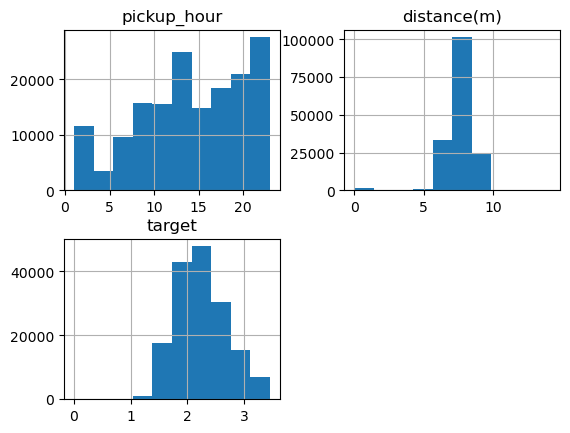

In [97]:
uu_df.hist()

In [98]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = uu_df.iloc[:, :-1], uu_df.iloc[:, -1]

X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=321)

dt_r = DecisionTreeRegressor(random_state=321)
rd_r = RandomForestRegressor(random_state=321)
gb_r = GradientBoostingRegressor(random_state=321)
xgb_r = XGBRegressor(random_state=321)
lgb_r = LGBMRegressor(random_state=321)

models = [dt_r, rd_r, gb_r, xgb_r, lgb_r]

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation_negative(y_test, prediction)

DecisionTreeRegressor
MSE: 0.1004, RMSE: 0.3168, R2: 0.4844
RandomForestRegressor
MSE: 0.0641, RMSE: 0.2531, R2: 0.6708
GradientBoostingRegressor
MSE: 0.0501, RMSE: 0.2238, R2: 0.7427
XGBRegressor
MSE: 0.0513, RMSE: 0.2264, R2: 0.7366
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 130110, number of used features: 2
[LightGBM] [Info] Start training from score 2.254697
LGBMRegressor
MSE: 0.0506, RMSE: 0.2249, R2: 0.7402


# Cycle06 (불필요 Cycle)
- LGBM 모델의 하이퍼 파라미터 값 수정하여 R2 점수를 높이기 위한 시도.

In [99]:
# from sklearn.model_selection import GridSearchCV
# from lightgbm import LGBMRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import KFold

# features, targets = uu_df.iloc[:, :-1], uu_df.iloc[:, -1]

# X_train, X_test, y_train, y_test = \
# train_test_split(features, targets, test_size=0.2, random_state=124)

# lgb_r = LGBMRegressor(random_state=321)

# parameters = {'max_depth': [4, 8, 12, 20], 'min_samples_split': [20, 30, 40, 50, 60], 'n_estimators': [10, 50, 100, 500]}
# kfold = KFold(n_splits=15, random_state=321, shuffle=True)

# # GridSearchCV(rf_r, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)
# grid_lgb_r = GridSearchCV(lgb_r, param_grid=parameters, scoring='r2', cv=kfold)
# grid_lgb_r.fit(X_train, y_train)

In [100]:
# result_df = pd.DataFrame(grid_lgb_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
# display(result_df)

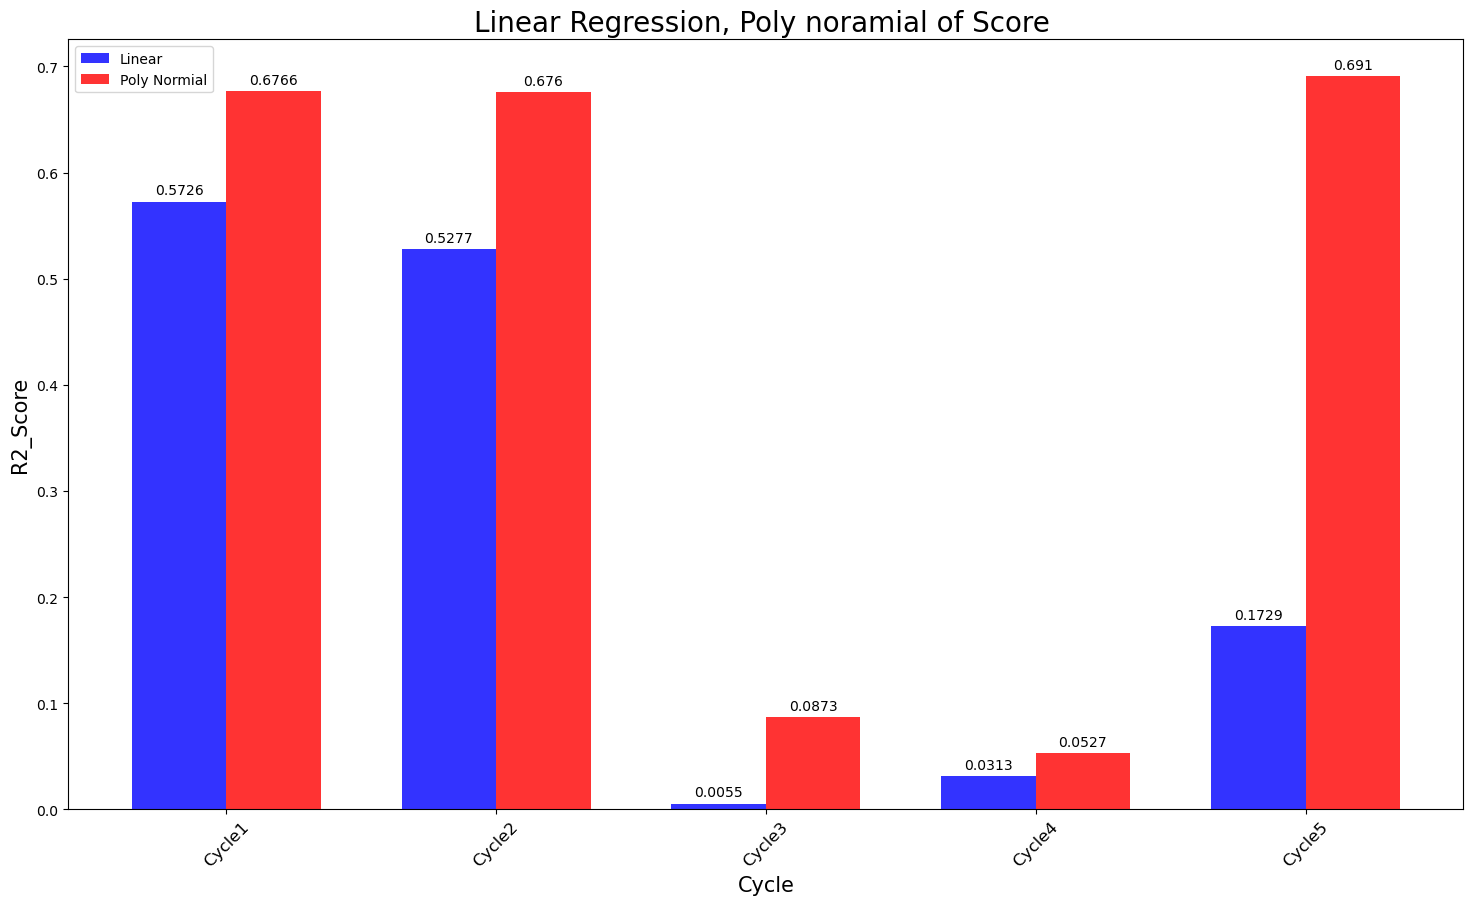

In [101]:
models = [
    'Cycle1', 'Cycle2', 'Cycle3', 'Cycle4', 'Cycle5'
]

Linear = [0.5726,0.5277, 0.0055, 0.0313, 0.1729]
Poly_normial = [0.6766, 0.6760, 0.0873, 0.0527, 0.6910]

# 그래프 설정
n_groups = len(models)
index = np.arange(n_groups)
bar_width = 0.35

fig, ax = plt.subplots(figsize=(18, 10))

bar1 = ax.bar(index - bar_width/2, Linear, bar_width, label='Linear', alpha=0.8, color='b')
bar2 = ax.bar(index + bar_width/2, Poly_normial, bar_width, label='Poly Normial', alpha=0.8, color='r')

ax.set_xlabel('Cycle', fontsize=15)
ax.set_ylabel('R2_Score', fontsize=15)
ax.set_title('Linear Regression, Poly noramial of Score ', fontsize=20)
ax.set_xticks(index)
ax.set_xticklabels(models, rotation=45, fontsize=12)
ax.legend()

# 막대 위에 수치 표시
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.show()


### 비선형 모델 판단.

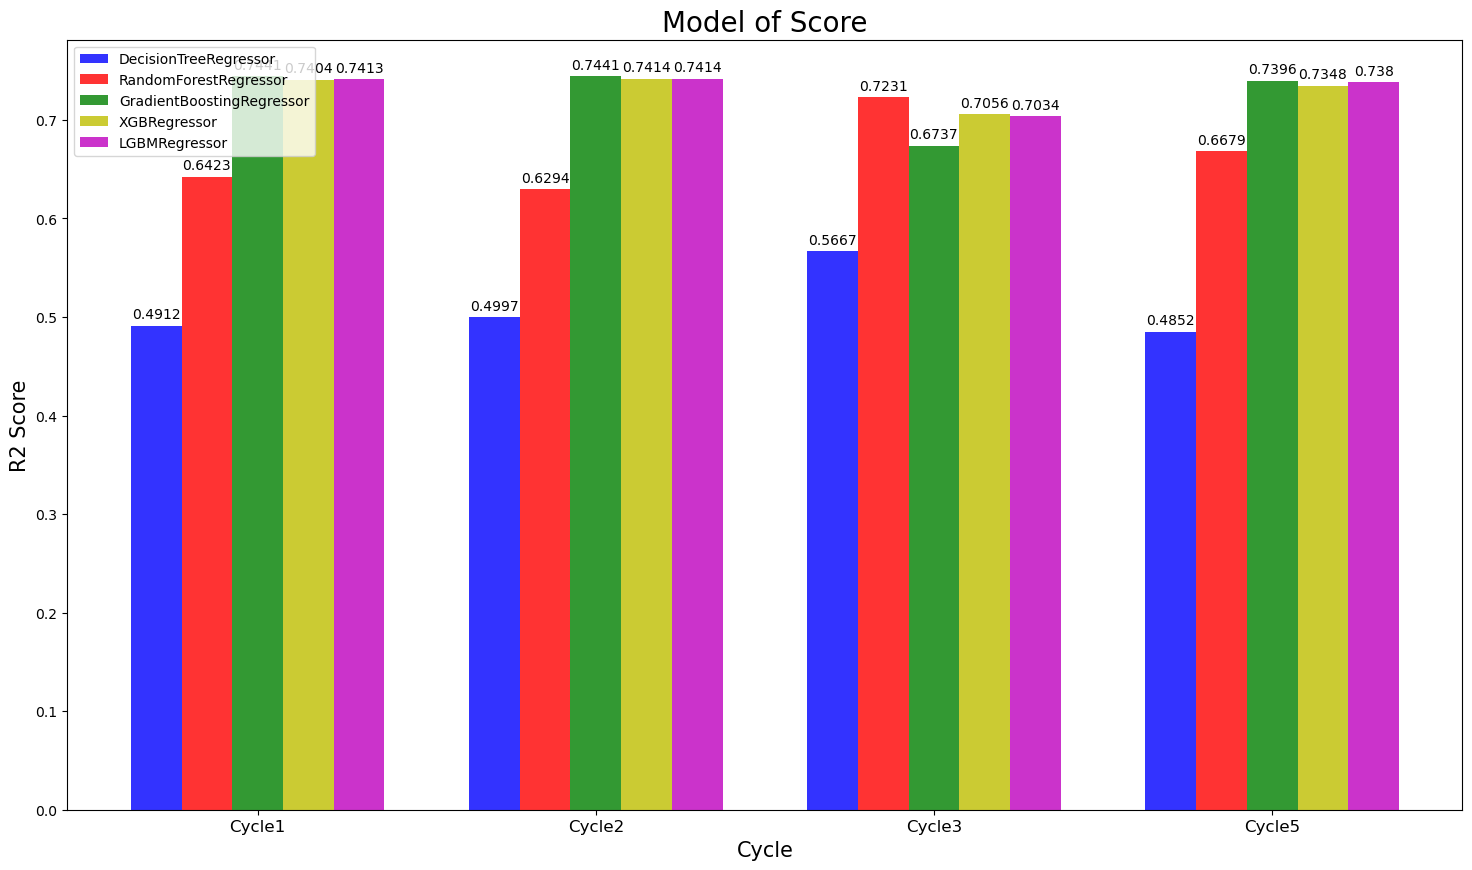

In [102]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Cycle1', 'Cycle2', 'Cycle3', 'Cycle5']

# 데이터 설정
DecisionTreeRegressor = [0.4912, 0.4997, 0.5667, 0.4852]
RandomForestRegressor = [0.6423, 0.6294, 0.7231, 0.6679]
GradientBoostingRegressor = [0.7441, 0.7441, 0.6737, 0.7396]
XGBRegressor = [0.7404, 0.7414, 0.7056, 0.7348]
LGBMRegressor = [0.7413, 0.7414, 0.7034, 0.7380]

n_groups = len(models)
index = np.arange(n_groups)
bar_width = 0.15  # 너비 설정 조정

fig, ax = plt.subplots(figsize=(18, 10))

# 각 막대 그래프 위치 조정
bar1 = ax.bar(index - 2*bar_width, DecisionTreeRegressor, bar_width, label='DecisionTreeRegressor', alpha=0.8, color='b')
bar2 = ax.bar(index - bar_width, RandomForestRegressor, bar_width, label='RandomForestRegressor', alpha=0.8, color='r')
bar3 = ax.bar(index, GradientBoostingRegressor, bar_width, label='GradientBoostingRegressor', alpha=0.8, color='g')
bar4 = ax.bar(index + bar_width, XGBRegressor, bar_width, label='XGBRegressor', alpha=0.8, color='y')
bar5 = ax.bar(index + 2*bar_width, LGBMRegressor, bar_width, label='LGBMRegressor', alpha=0.8, color='m')

ax.set_xlabel('Cycle', fontsize=15)
ax.set_ylabel('R2 Score', fontsize=15)
ax.set_title('Model of Score', fontsize=20)
ax.set_xticks(index)
ax.set_xticklabels(models, fontsize=12)
ax.legend()

# 막대 위에 수치 표시
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# 모든 막대에 대해 수치 표시 함수 호출
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)
autolabel(bar5)

plt.show()


# 결론
1) 데이터간 위도, 경도의 위치 변화로는 정확한 요금에 대한 상관관계를 찾기 어려웠습니다.
2) 따라서 해당 데이터를 가지고 직선거리 상의 변화에 따라 회귀분석을 진행하였습니다.
3) 확인 결과 선형모델을 사용했을 때 보다 비선형 모델을 사용했을 때 수치가 0.6 까지 오를 부분을 확인하였습니다.
4) 따라서 데이터엔지니어링이 진행된 데이터 셋으로 LGBM 모델을 선택하였습니다.
5) 하이퍼 파라미터를 수정하여 R2 Score값을 조정하여 수치를 높였습니다.
6) 따라서 Uber의 요금을 계산할 때 직선거리로만 선택하였을 떄 이동거리가 높을 수록 요금이 높게 나오는 것을 확인하였으며, Uber의 경우 시간대가 target데이터의 값에 상관관계가 높지 않음을 확인하였습니다.
7) 결론적으로 Uber 이용 시 이동거리에 따른 요금 변화가 가장 중요하고 해당 데이터 뿐만이 아닌 더 많은 거리를 이동한 데이터를 확인 했을 때 회귀 분석 모델의 신뢰성을 높일 수 있을 것으로 판단됩니다.

MSE: 0.1232, RMSE: 0.3509, MSLE: 0.0146, RMSLE: 0.1207, R2: 0.3680


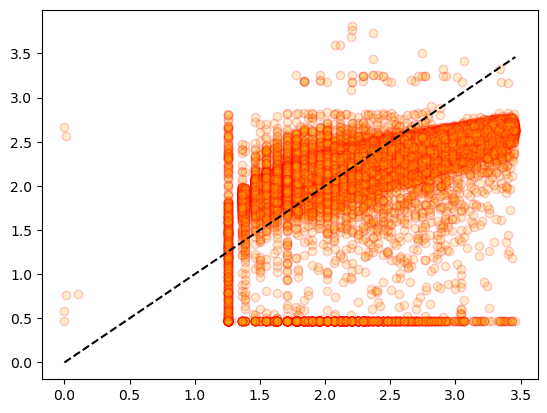

In [106]:
import matplotlib.pyplot as plt

l_r.fit(X_train, y_train)
prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

MSE: 0.1215, RMSE: 0.3485, MSLE: 0.0143, RMSLE: 0.1195, R2: 0.3759


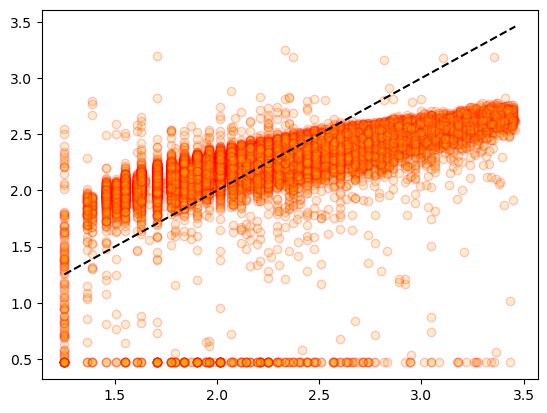

In [104]:
import matplotlib.pyplot as plt

prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()